In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
app_data = pd.read_csv('/content/drive/MyDrive/aa-OrgaDeDatos/googleplaystore.csv')
app_reviews = pd.read_csv('/content/drive/MyDrive/aa-OrgaDeDatos/googleplaystore_user_reviews.csv')

In [ ]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
app_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
for column in app_data.columns:
    print(app_data[column].unique()) #Dejo a modo de ilustración los valores que se pueden encontrar en las filas

['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]
['159' '967' '87510' ... '603' '1195' '398307']
['19M' '14M' '8.7M' '25M' '2.8M' '

In [ ]:
app_data.dropna(inplace = True) # Aquellas filas que contienen valores na son en su mayoría ratings, que buscando un criterio de inputación, traté
                                # de utilizar la media, pero quedó prácticamente igual, así que por optimización droppeo las filas asociadas
#Hay una entrada inválida en content rating por eso la borro
invalid_index = app_data.loc[(app_data["Content Rating"] == "Unrated"), :].index
app_data.drop(invalid_index, inplace = True)

In [ ]:
app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
app_reviews_filtered = app_reviews.dropna() #Los que tiene null son aquellos que solo tienen el nombre de la app, por lo tanto no tiene sentido usar dichas filas
app_reviews_filtered.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
app_reviews3 = app_reviews_filtered.loc[app_reviews["Sentiment_Polarity"] != 0, :]

Text(0, 0.5, 'Ammount of apps')

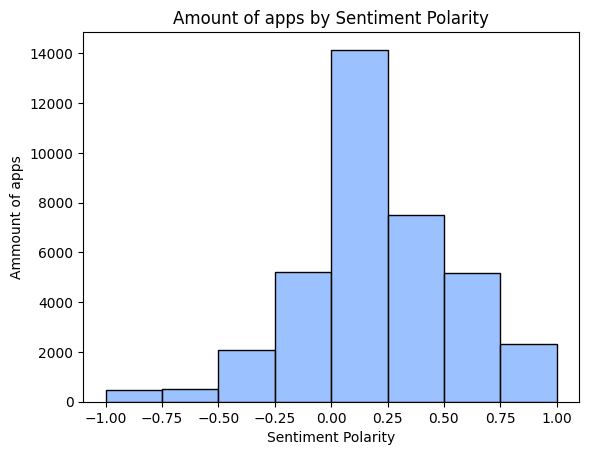

In [33]:
bin_edges = [-1.0, -.75, -.5, -.25, 0, .25, .5, .75, 1]
sns.histplot(x = "Sentiment_Polarity", data = app_reviews_filtered, color ="#7aadff", bins=bin_edges)
plt.title("Amount of apps by Sentiment Polarity")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Ammount of apps")
#En este plot se puede observar que por muchísima diferencia, la polaridad de sentimientos es neutral, pero tiende a ser positiva (Normal no estandar)

Text(0.5, 1.0, 'Sentiment subjectivity as function of Sentiment')

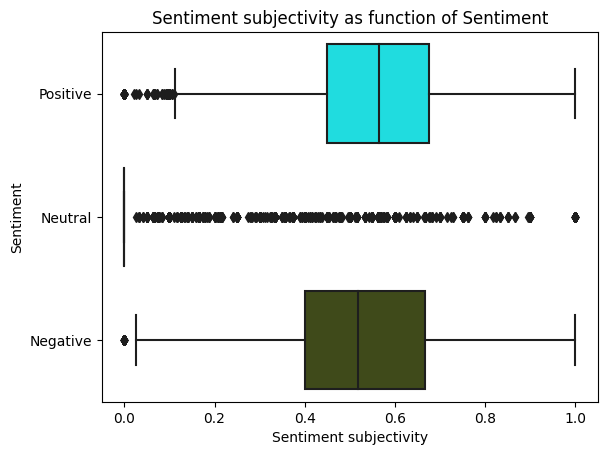

In [ ]:
# custom_palette = {"Positive": "#ff9900", "Neutral": "grey", "Negative": "#4a2222"}#0015ff
custom_palette = {"Positive": "#00fbff", "Neutral": "grey", "Negative": "#435212"}
box2 = sns.boxplot(x = "Sentiment_Subjectivity", y = "Sentiment", data = app_reviews_filtered, palette=custom_palette)
plt.xlabel("Sentiment subjectivity")
plt.ylabel("Sentiment")
plt.title("Sentiment subjectivity as function of Sentiment")
#En este gráfico se puede ver, al contrario de lo que uno puede intuitivamente pensar, que
#es mas subjetivo aquel que tuvo un pensamiento positivo, a aquel que tuvo un negativo, también que los que son subjetivos con el sentimiento al ser "neutros"
#se consideran outliers, lo cual tiene sentido

In [ ]:
app_data_filtered = app_data.drop_duplicates(subset=["App"])

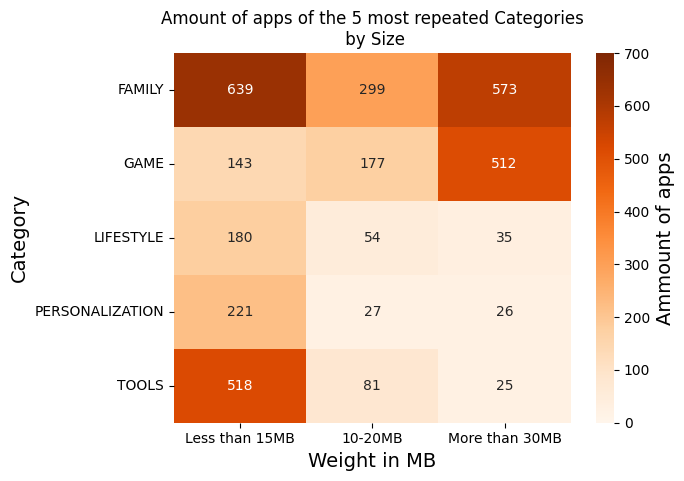

In [32]:
def formatear_espacio(tamanio):
    if('k' in tamanio):
        return float(tamanio.replace('k', '')) * 0.001
    elif ('M' in tamanio):
        return float(tamanio.replace('M', ''))

installs = app_data_filtered.drop(app_data_filtered[app_data_filtered["Size"].str.contains("Varies")].index)
installs['size_in_mb'] = installs.Size.map(formatear_espacio)

categories_with_most_apps = installs.groupby("Category").agg('count').sort_values(by="Rating", ascending=False).reset_index().nlargest(5, "App").Category

installs = installs.loc[installs["Category"].isin(categories_with_most_apps.values), :]
intervalos = [0, 15, 30, float('inf')]  # Define los intervalos en MB
etiquetas = ['Less than 15MB', '10-20MB', 'More than 30MB']

installs.loc[:, ['size_interval']] = pd.cut(installs['size_in_mb'], bins=intervalos, labels=etiquetas) #Método de pandas para mappear una subintervalo de una lista a un valor determinado para las respectivas filas, bins son los intervalos
heatmap_data = installs.loc[:, ["Category", "size_interval"]].groupby(["Category", "size_interval"]).size().unstack()
heatmap_data

heatmap = sns.heatmap(heatmap_data, vmin=0, vmax=700, annot=True, fmt=".0f", cmap="Oranges")
plt.ylabel("Category", fontsize=14)
plt.xlabel("Weight in MB", fontsize=14)
plt.title("Amount of apps of the 5 most repeated Categories\n by Size")
# plt.title("Cantidad de aplicaciones de las 5 categorias con mas apps por tamanio ")
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Ammount of apps', fontsize=14)

plt.show()

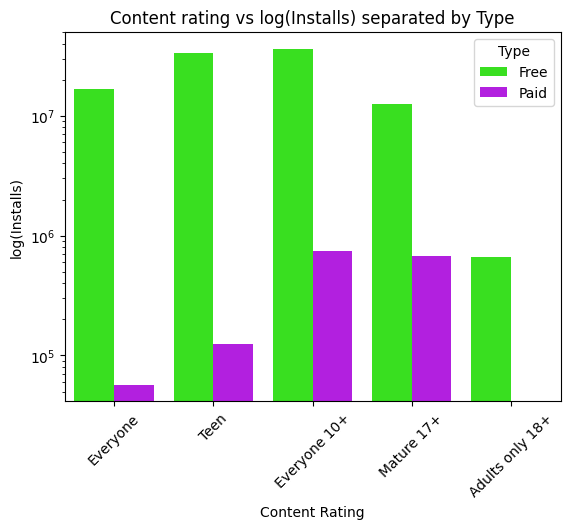

In [ ]:
def format_installs(installs_amount):
    formatted_amount = str.replace(installs_amount, "+", "")
    return int(str.replace(formatted_amount, ",", ""))

app_data["Formatted Installs"] = app_data.Installs.map(format_installs)
a = app_data.loc[:, "Content Rating"]
b = app_data.loc[:, "Formatted Installs"]
c = app_data.loc[:, "Type"]
plt.yscale("log")
plt.title("Content rating vs log(Installs) separated by Type")
plot = sns.barplot(x = a, y = b, hue=c, palette = {"Free": "#22ff00", "Paid": "#c300ff"}, errorbar=None )
plot.set(xlabel='Content Rating', ylabel='log(Installs)')
plt.xticks(rotation=45)
plt.show()
#En el eje y use una escala logaritmica de logs porque al tener millones de instalaciones no se llegaba a apreciar de manera correcta si no era con esta escala